In [9]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [131]:
data_raw = pd.read_csv('data/NBA Season Data.csv')
data_raw.describe()

,Year,Age,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,...,D-WORP,Adjusted WORP,Estimated Position,BBRef Pos,Age on Feb 1,Yrs Experience,Height,Weight,Rounded Position,Rounded Age
count,17729.000000,17729.000000,17729.000000,17729.000000,17729.000000,17663.000000,17011.000000,17651.000000,17729.000000,17729.00000,...,17729.000000,17263.000000,17727.000000,17261.00000,17261.000000,17261.000000,17261.000000,17261.000000,17727.000000,17261.000000
mean,1999.166958,26.087145,47.639686,1132.965706,12.138818,0.489599,0.146633,0.314121,6.086914,13.33439,...,0.241593,2.210624,2.805805,3.02523,27.361191,4.373964,78.831933,214.022652,2.803520,27.444296
std,11.119839,5.816735,28.289753,949.747290,6.701130,0.126480,0.183274,0.236330,5.082961,6.94874,...,1.834127,3.869624,1.410654,1.41301,4.514413,3.831708,4.281610,27.746527,1.450073,4.524939
min,1978.000000,0.000000,0.000000,0.000000,-90.600000,0.000000,0.000000,0.000000,0.000000,0.00000,...,-9.200000,-1.700000,0.000000,1.00000,18.270000,0.000000,0.000000,0.000000,0.000000,18.000000
25%,1990.000000,23.000000,21.000000,239.000000,9.400000,0.467000,0.003000,0.193000,2.400000,8.50000,...,-0.500000,0.000000,1.500000,2.00000,24.180000,1.000000,76.000000,192.000000,1.000000,24.000000
50%,2000.000000,26.000000,52.000000,935.000000,12.600000,0.514000,0.048000,0.286000,5.300000,12.50000,...,0.000000,0.100000,2.800000,3.00000,26.660000,3.000000,79.000000,215.000000,3.000000,27.000000
75%,2009.000000,29.000000,75.000000,1894.000000,15.700000,0.550000,0.265000,0.394000,9.000000,17.90000,...,0.700000,3.100000,4.000000,4.00000,29.970000,7.000000,82.000000,233.000000,4.000000,30.000000
max,2016.000000,44.000000,82.000000,3638.000000,129.100000,1.250000,1.000000,6.000000,100.000000,100.00000,...,15.100000,35.200000,5.000000,5.00000,115.090000,20.000000,91.000000,360.000000,5.000000,115.000000


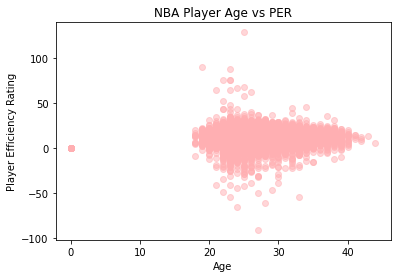

In [136]:
fig, ax = plt.subplots()
ax.scatter(data_raw['Age'], data_raw['PER'], alpha = 0.5, color = '#ffafb2')
plt.title('NBA Player Age vs PER')
plt.xlabel('Age')
plt.ylabel('Player Efficiency Rating');

In [132]:
data = data_raw.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,21,94]]
data.head()

,Year,Tm,Player,Age,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,WS,TrueSalary
0,1978,NOJ,Truck Robinson,26,82,3638,15.7,0.481,NaN,0.340,8.0,25.8,17.0,6.8,0.9,1.1,6.5,"$8,800,000"
1,1978,BUF,Randy Smith,29,82,3314,19.1,0.521,NaN,0.326,3.6,6.4,5.0,22.2,2.4,0.2,7.9,"$14,800,000"
2,1978,WSB,Elvin Hayes,32,81,3246,17.1,0.489,NaN,0.365,10.2,22.7,16.4,6.5,1.3,2.4,8.3,"$14,700,000"
3,1978,BOS,Dave Cowens,29,77,3215,18.6,0.533,NaN,0.233,8.0,25.6,17.0,15.7,1.4,1.1,10.8,"$20,600,000"
4,1978,NYK,Bob McAdoo,26,79,3182,22.0,0.567,NaN,0.412,7.8,24.7,16.4,13.4,1.4,2.0,10.9,"$18,500,000"


In [125]:
data = data.dropna(axis = 0, how = 'any')
data = data[data['Year'] != 2016]
data

,Year,Tm,Player,Age,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,WS,TrueSalary
643,1980,LAL,Norm Nixon,24,82,3226,14.9,0.548,0.007,0.209,1.9,5.5,3.9,25.3,2.1,0.2,6.7,"$9,700,000"
644,1980,WSB,Elvin Hayes,34,81,3183,17.2,0.492,0.008,0.285,8.4,20.0,14.1,6.1,0.9,3.1,6.2,"$8,600,000"
645,1980,NYK,Bill Cartwright,22,82,3150,17.9,0.608,0.000,0.466,6.6,18.6,12.6,7.0,0.7,1.7,9.7,"$11,500,000"
646,1980,LAL,Kareem Abdul-Jabbar,32,82,3143,25.3,0.639,0.001,0.344,7.2,22.2,15.4,16.5,1.2,4.6,14.8,"$24,500,000"
647,1980,HOU,Moses Malone,24,82,3140,24.1,0.560,0.004,0.505,19.6,22.3,20.9,7.1,1.2,1.9,11.9,"$16,300,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16797,2015,ATL,Austin Daye,26,8,76,12.1,0.484,0.538,0.077,6.2,14.6,10.5,16.0,2.7,2.2,0.1,"$600,000"
16801,2015,GSW,Ognjen Kuzmic,24,16,72,12.9,0.727,0.000,0.333,10.8,14.5,12.7,11.1,1.4,1.0,0.3,"$700,000"
16805,2015,POR,Tim Frazier,24,5,68,13.7,0.557,0.333,0.333,3.2,10.8,7.1,36.7,1.5,0.0,0.2,"$700,000"
16816,2015,LAC,Lester Hudson,30,5,56,16.0,0.571,0.429,0.286,2.1,13.8,8.0,12.6,5.4,1.5,0.2,"$900,000"


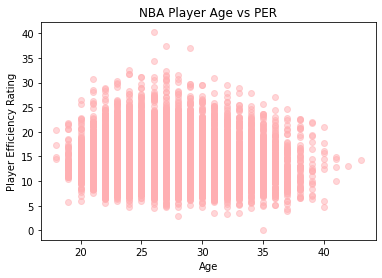

In [130]:
fig, ax = plt.subplots()
ax.scatter(data['Age'], data['PER'], alpha = 0.5, color = '#ffafb2')
plt.title('NBA Player Age vs PER')
plt.xlabel('Age')
plt.ylabel('Player Efficiency Rating');

In [103]:
datayear = data.groupby('Year')
dataage = data[data['G'] > 29].groupby('Age')
dataplayer = data.groupby('Player')

In [104]:
dataplayer.aggregate(np.mean)

,Year,Age,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,WS
Player,,,,,,,,,,,,,,,
A.C. Green,1993.705882,29.705882,75.176471,2150.117647,13.958824,0.544765,0.049471,0.438882,10.400000,18.711765,14.617647,5.264706,1.435294,0.870588,5.847059
A.J. English,1991.000000,23.000000,70.000000,1443.000000,10.600000,0.480000,0.054000,0.274000,5.000000,6.200000,5.600000,18.000000,0.900000,0.600000,0.200000
A.J. Price,2012.200000,25.200000,43.400000,739.800000,13.140000,0.496200,0.477200,0.203600,1.860000,8.380000,5.100000,23.760000,1.620000,0.160000,0.980000
Aaron Brooks,2011.666667,26.666667,52.444444,1245.555556,13.400000,0.526222,0.412667,0.208111,2.211111,6.700000,4.466667,24.177778,1.388889,0.444444,1.988889
Aaron Gordon,2015.000000,19.000000,47.000000,797.000000,11.400000,0.517000,0.231000,0.293000,6.400000,17.800000,12.000000,6.300000,1.300000,2.200000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zaza Pachulia,2010.200000,25.200000,69.400000,1551.000000,14.250000,0.538900,0.005400,0.536200,12.250000,19.590000,15.930000,9.330000,1.780000,1.340000,3.490000
Zeljko Rebraca,2004.000000,31.000000,42.400000,645.800000,12.900000,0.576000,0.000000,0.421600,7.060000,16.520000,11.880000,4.120000,0.920000,3.380000,1.640000
Zendon Hamilton,2004.000000,28.000000,46.000000,473.000000,15.900000,0.616000,0.000000,1.011000,12.300000,23.900000,18.200000,4.800000,0.900000,1.300000,1.800000


In [105]:
datayear.aggregate(np.mean)

,Age,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,WS
Year,,,,,,,,,,,,,,
1980,26.365462,64.658635,1674.277108,14.510843,0.526759,0.028896,0.320711,6.918876,13.480723,10.199197,14.323695,1.774699,1.245382,3.649799
1981,26.274194,66.983871,1745.947581,14.466935,0.528508,0.023516,0.328669,6.739516,13.252419,9.992339,14.578226,1.797984,1.258468,3.833065
1982,26.206642,64.147601,1608.321033,14.258672,0.532830,0.026022,0.331173,6.700738,13.349446,10.018450,13.815867,1.674539,1.301107,3.504059
1983,26.335821,63.623134,1603.880597,14.105224,0.523787,0.023989,0.324112,6.853731,13.254478,10.061567,14.069776,1.733955,1.277985,3.522761
1984,26.414634,69.878049,1761.373984,14.296341,0.538167,0.029622,0.351740,6.714634,13.148374,9.936992,14.516260,1.726423,1.210976,3.802846
1985,26.566929,67.078740,1700.964567,14.216535,0.540791,0.035150,0.340268,6.635827,13.047244,9.846063,14.195276,1.696063,1.227559,3.728346
1986,26.807692,65.923077,1663.365385,14.391538,0.537546,0.041423,0.356881,6.462308,13.283462,9.876538,14.662308,1.734231,1.213846,3.635000
1987,26.853282,64.930502,1655.667954,14.224710,0.532409,0.052927,0.355259,6.825097,12.951737,9.888417,14.814672,1.735907,1.334363,3.655212
1988,26.922222,62.548148,1586.511111,14.330370,0.535093,0.063626,0.341007,6.560741,13.069259,9.812222,14.590741,1.730741,1.294074,3.510000


In [74]:
dataage.aggregate(np.mean)

,Year,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,WS
Age,,,,,,,,,,,,,,
18,2000.000000,55.000000,888.666667,15.533333,0.539667,0.146000,0.395000,9.066667,15.333333,12.100000,10.900000,2.033333,3.200000,1.666667
19,2005.808511,66.851064,1637.340426,14.291489,0.515277,0.147511,0.335362,7.172340,14.838298,10.974468,12.163830,1.619149,2.308511,2.555319
20,2005.945946,68.445946,1704.297297,14.666216,0.525351,0.140162,0.342500,7.049324,15.373649,11.179730,12.770946,1.758784,2.157432,3.116892
21,2004.048780,68.059233,1783.829268,14.937979,0.525537,0.157265,0.318195,6.736585,14.821603,10.751568,13.019164,1.721254,1.878746,3.495819
22,1999.491603,67.010687,1630.374046,14.301374,0.525679,0.130020,0.332133,6.790687,14.115573,10.439389,13.365344,1.732214,1.636947,3.209160
23,1997.542982,67.196953,1666.099021,14.382481,0.528305,0.124431,0.332785,6.602720,13.824048,10.204897,13.716431,1.790207,1.573993,3.465832
24,1997.488119,67.360396,1733.077228,14.745446,0.532591,0.131951,0.330623,6.500495,13.789901,10.139802,14.074059,1.777723,1.557921,3.844257
25,1997.517893,67.515905,1754.474155,14.892247,0.533901,0.136912,0.329067,6.316203,13.884592,10.093241,14.453181,1.747913,1.509543,4.044135
26,1997.702282,66.864108,1789.288382,14.897925,0.535293,0.140976,0.327663,6.213693,13.805913,10.007780,14.504253,1.718672,1.459440,4.158610


In [106]:
data19 = data[(data['Age'] == 19) & (data['G'] > 29)]
data20 = data[(data['Age'] == 20) & (data['G'] > 29)]
data21 = data[(data['Age'] == 21) & (data['G'] > 29)]
data22 = data[(data['Age'] == 22) & (data['G'] > 29)]
data23 = data[(data['Age'] == 23) & (data['G'] > 29)]
data24 = data[(data['Age'] == 24) & (data['G'] > 29)]
data25 = data[(data['Age'] == 25) & (data['G'] > 29)]
data26 = data[(data['Age'] == 26) & (data['G'] > 29)]
data27 = data[(data['Age'] == 27) & (data['G'] > 29)]
data28 = data[(data['Age'] == 28) & (data['G'] > 29)]
data29 = data[(data['Age'] == 29) & (data['G'] > 29)]
data30 = data[(data['Age'] == 30) & (data['G'] > 29)]
data31 = data[(data['Age'] == 31) & (data['G'] > 29)]
data32 = data[(data['Age'] == 32) & (data['G'] > 29)]
data33 = data[(data['Age'] == 33) & (data['G'] > 29)]
data34 = data[(data['Age'] == 34) & (data['G'] > 29)]
data35 = data[(data['Age'] == 35) & (data['G'] > 29)]
data36 = data[(data['Age'] == 36) & (data['G'] > 29)]
data37 = data[(data['Age'] == 37) & (data['G'] > 29)]
data38 = data[(data['Age'] == 38) & (data['G'] > 29)]

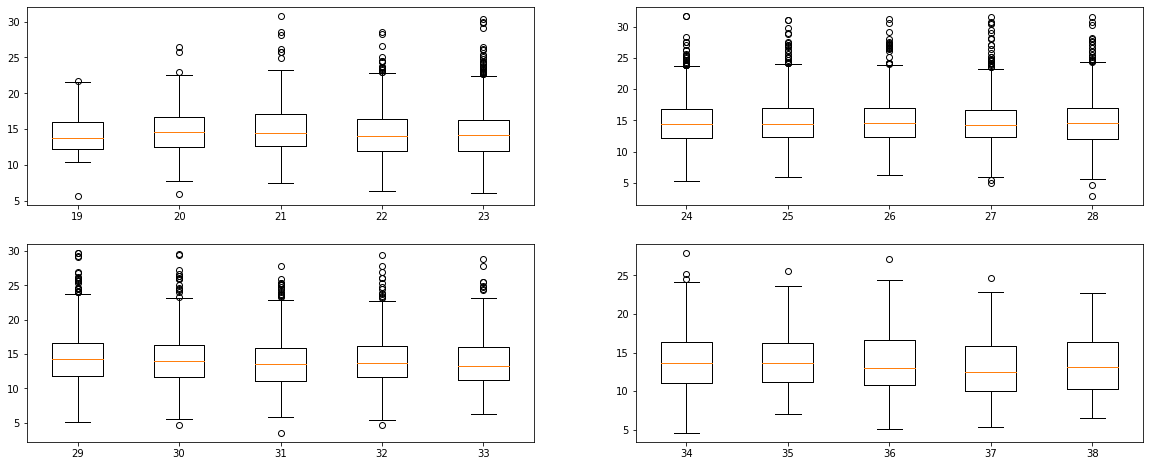

In [107]:
fig,ax = plt.subplots(2,2, figsize = (20,8))
ax[0,0].boxplot([data19['PER'],data20['PER'],data21['PER'],data22['PER'],data23['PER']]);
ax[0,0].set_xticklabels(range(19,24));
ax[0,1].boxplot([data24['PER'],data25['PER'],data26['PER'],data27['PER'],data28['PER']]);
ax[0,1].set_xticklabels(range(24,29));
ax[1,0].boxplot([data29['PER'],data30['PER'],data31['PER'],data32['PER'],data33['PER']]);
ax[1,0].set_xticklabels(range(29,34));
ax[1,1].boxplot([data34['PER'],data35['PER'],data36['PER'],data37['PER'],data38['PER']]);
ax[1,1].set_xticklabels(range(34,39));

553